# Problem Statement

Assuming we have a set of points that all belong to a single line. By choosing two points we can calculate the characteristics of the line and assuming we have no statistical error we can prove that all other points are part of the line

However we will always have measurement errors with Lidar, therefore we need to use tatistical methods to fit a line through the points that minimizez the error

## Ideal Situation

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from LidarSim.lidar_sim import LidarSimulator

In [115]:
lidar = LidarSimulator("square.stl")
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=np.radians(90), view_range=60)
triangles = lidar.get_map_triangles()

In [116]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

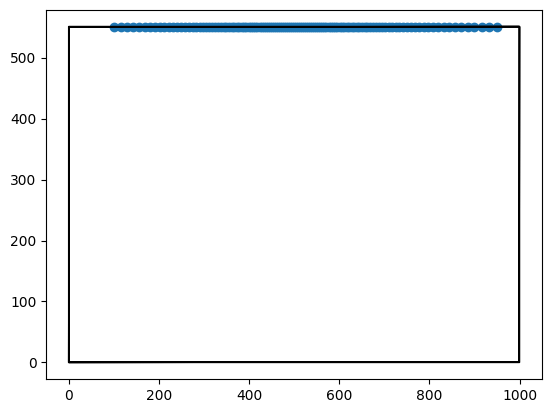

In [117]:
fig,ax = plt.subplots()
plt.scatter (x, y)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)

In [118]:
m = (y[-1] - y[0]) / (x[-1] - x[0])
b = y[-1] - m * x[-1]
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - m * x[i] - b)
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: 0.00, median: 0.00, standard deviation: 0.00


# With statistical error

In [119]:
lidar = LidarSimulator("square.stl", error=0.02)
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=np.radians(90), view_range=60)
triangles = lidar.get_map_triangles()

In [120]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

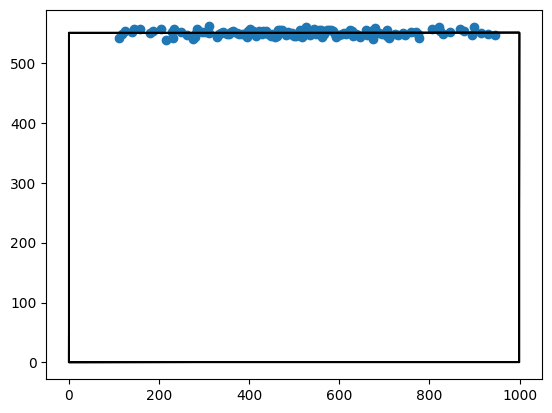

In [121]:
fig,ax = plt.subplots()
plt.scatter (x, y)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)

In [122]:
m = (y[-1] - y[0]) / (x[-1] - x[0])
b = y[-1] - m * x[-1]
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - m * x[i] - b)
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: 5.42, median: 4.74, standard deviation: 4.84


## Statistical Line Fitting

In [123]:
model = np.polyfit (x, y, 1)

In [124]:
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - model[0] * x[i] - model[1])
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: -0.00, median: -0.58, standard deviation: 4.71


In [128]:
x[-1]

112.24528422956826

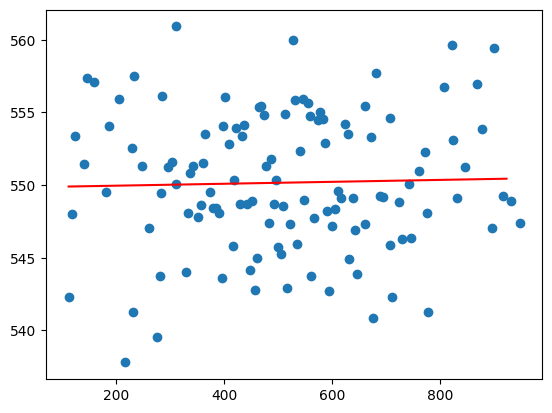

In [134]:
x_lin_reg = np.arange(x[-1], x[1], 10)
predict = np.poly1d(model)
y_lin_reg = predict(x_lin_reg)

fig,ax = plt.subplots()
plt.scatter (x, y)
plt.plot (x_lin_reg, y_lin_reg, c = 'r')